In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/PS_20174392719_1491204439457_log.csv


In [60]:
import warnings
warnings.filterwarnings('ignore')


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [62]:
df = pd.read_csv('/kaggle/input/fraud-detection/PS_20174392719_1491204439457_log.csv')

In [63]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [64]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [65]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [66]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [67]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['step'])

In [68]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['isFraud'])

In [69]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['type'])

In [70]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['isFlaggedFraud'])

In [71]:
y = df['isFraud']

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,target
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0


In [74]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [75]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

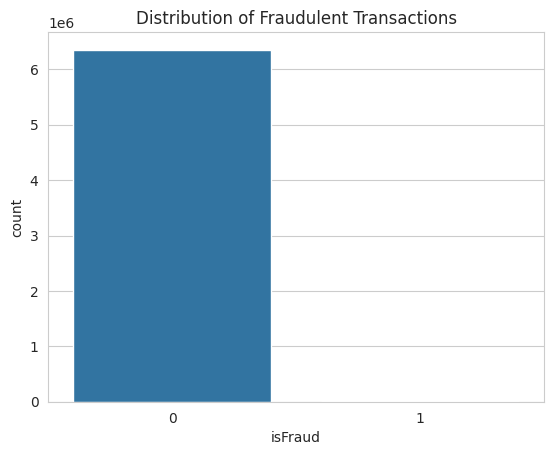

In [76]:
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

In [77]:
fraud_percentage = df['isFraud'].mean() * 100
print(f'Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%')

Percentage of Fraudulent Transactions: 0.13%


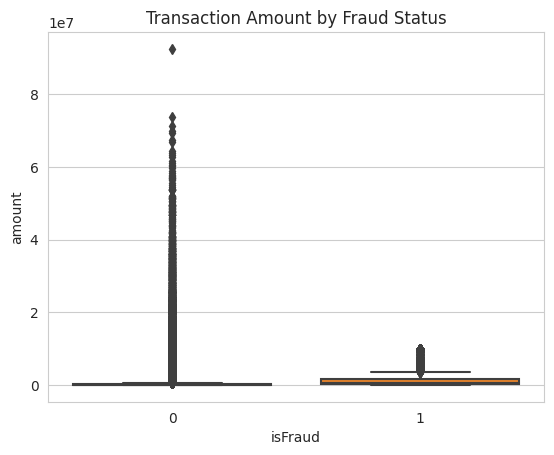

In [78]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.show()

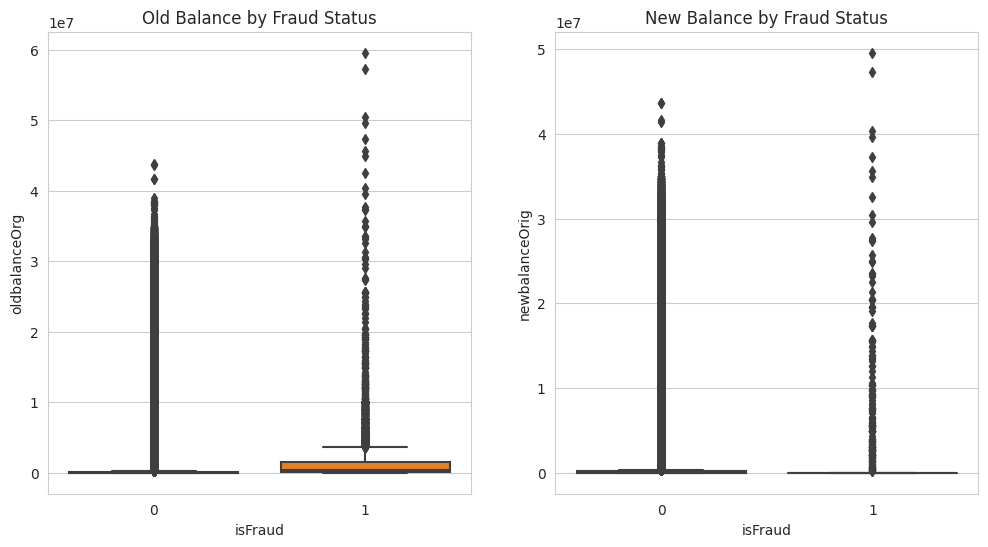

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df)
plt.title('Old Balance by Fraud Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='isFraud', y='newbalanceOrig', data=df)
plt.title('New Balance by Fraud Status')

plt.show()

In [80]:
# Filter the dataset to include only rows where isFraud is 1 (fraudulent transactions)
fraud_df = df[df['isFraud'] == 1]

# Set the style for seaborn
sns.set_style('whitegrid')

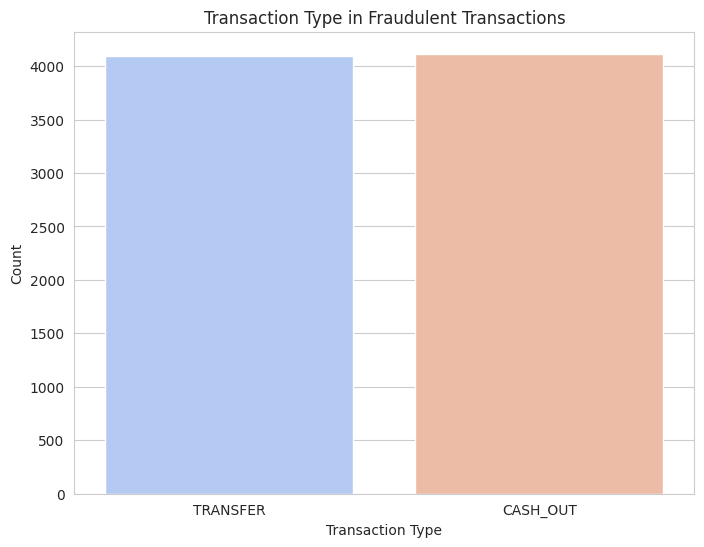

In [81]:
# Plot 1: Distribution of Transaction Types in Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=fraud_df, palette='coolwarm')
plt.title('Transaction Type in Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

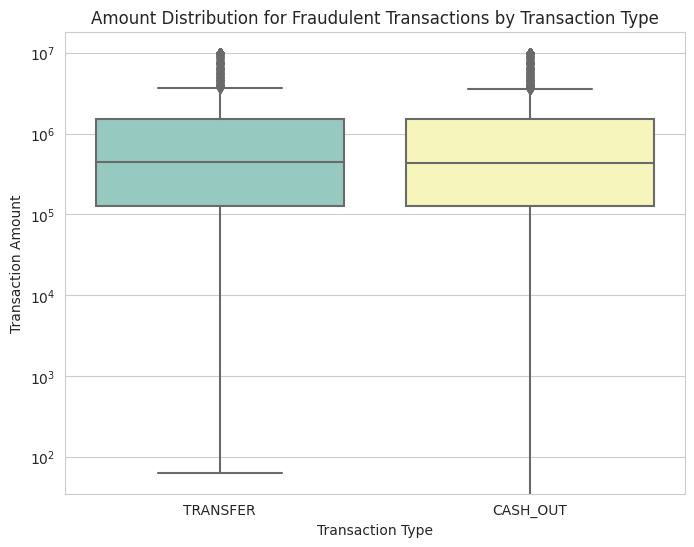

In [82]:

# Plot 2: Amount Distribution for Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='amount', data=fraud_df, palette='Set3')
plt.title('Amount Distribution for Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Log scale to handle outliers
plt.show()

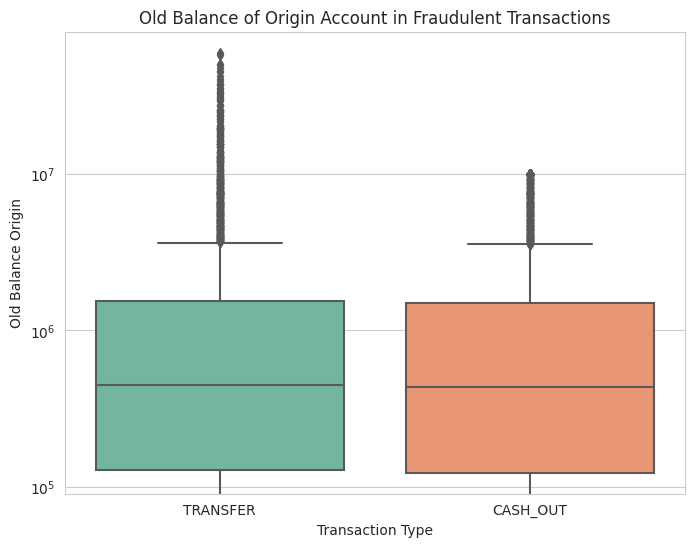

In [83]:

# Plot 3: Old Balance Origin for Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='oldbalanceOrg', data=fraud_df, palette='Set2')
plt.title('Old Balance of Origin Account in Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Old Balance Origin')
plt.yscale('log')
plt.show()

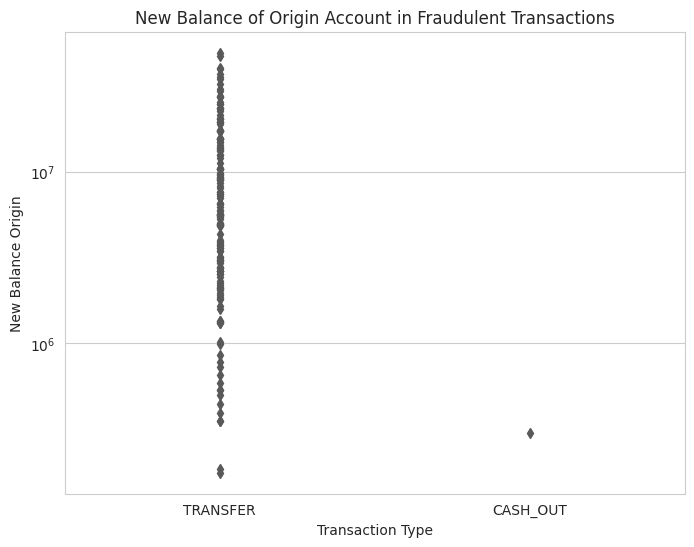

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='newbalanceOrig', data=fraud_df, palette='Set2')
plt.title('New Balance of Origin Account in Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('New Balance Origin')
plt.yscale('log')
plt.show()

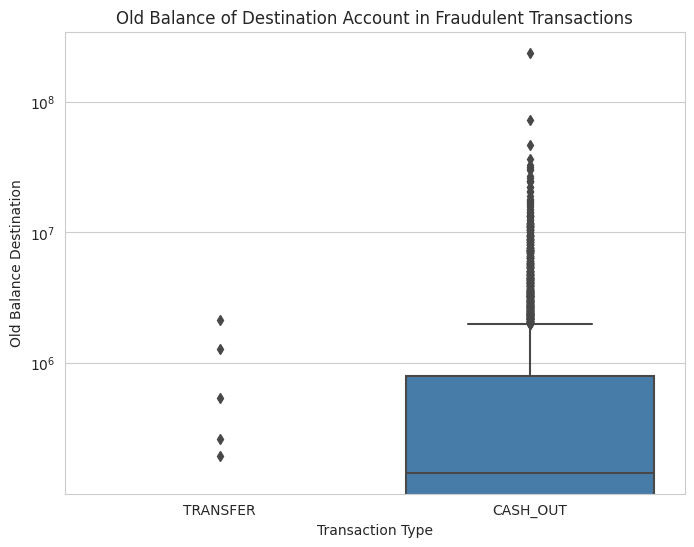

In [85]:
# Plot 5: Old Balance Destination for Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='oldbalanceDest', data=fraud_df, palette='Set1')
plt.title('Old Balance of Destination Account in Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Old Balance Destination')
plt.yscale('log')
plt.show()

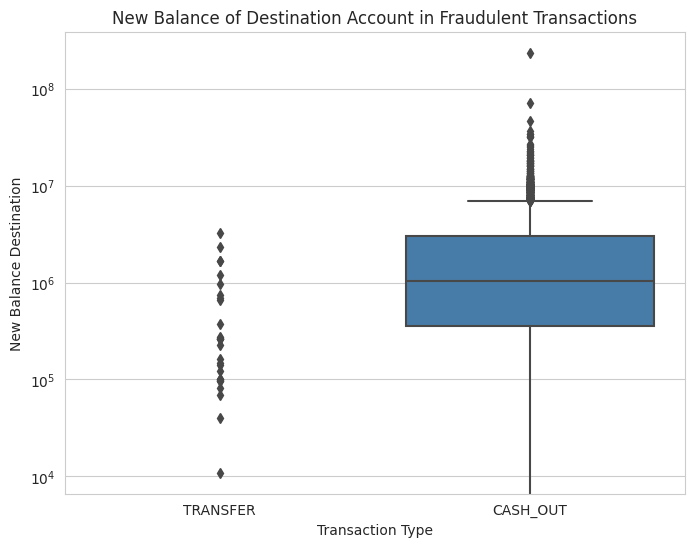

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='newbalanceDest', data=fraud_df, palette='Set1')
plt.title('New Balance of Destination Account in Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('New Balance Destination')
plt.yscale('log')
plt.show()

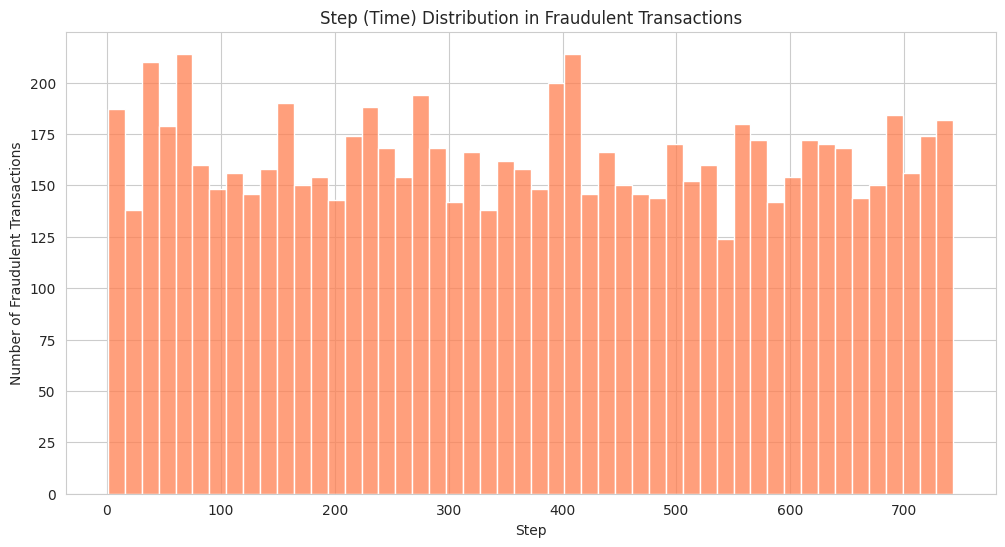

In [87]:
# Plot 7: Step (time) Distribution for Fraudulent Transactions
plt.figure(figsize=(12, 6))
sns.histplot(fraud_df['step'], bins=50, kde=False, color='coral')
plt.title('Step (Time) Distribution in Fraudulent Transactions')
plt.xlabel('Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

In [88]:
df['diffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

fraud_df = df[df['isFraud'] == 1]

sns.set_style('whitegrid')

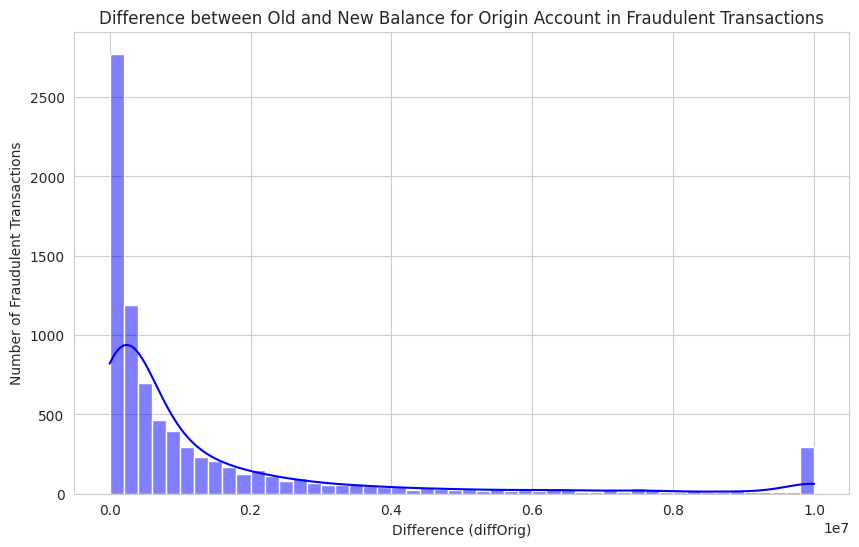

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['diffOrig'], bins=50, kde=True, color='blue')
plt.title('Difference between Old and New Balance for Origin Account in Fraudulent Transactions')
plt.xlabel('Difference (diffOrig)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

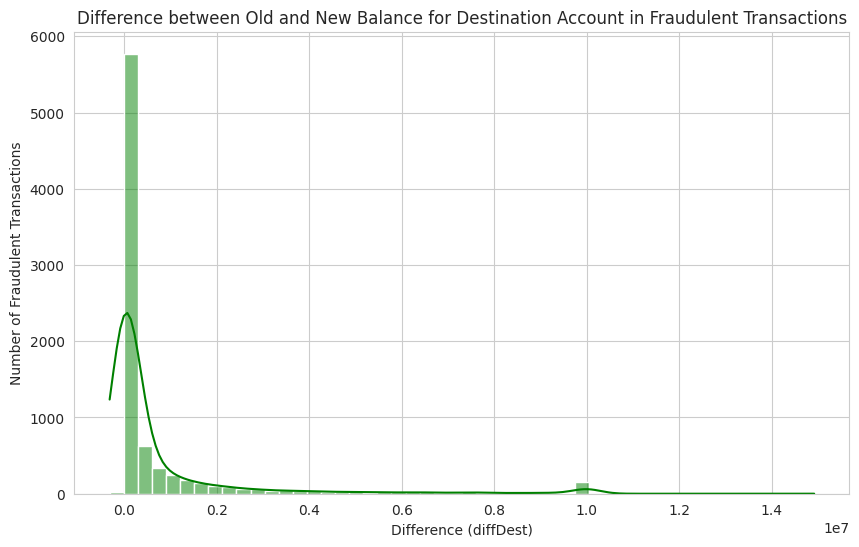

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['diffDest'], bins=50, kde=True, color='green')
plt.title('Difference between Old and New Balance for Destination Account in Fraudulent Transactions')
plt.xlabel('Difference (diffDest)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

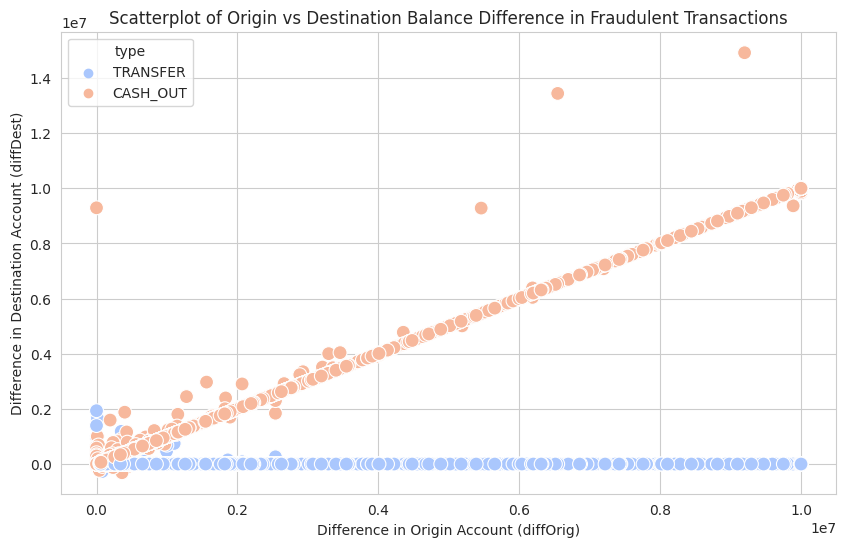

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diffOrig', y='diffDest', data=fraud_df, hue='type', palette='coolwarm', s=100)
plt.title('Scatterplot of Origin vs Destination Balance Difference in Fraudulent Transactions')
plt.xlabel('Difference in Origin Account (diffOrig)')
plt.ylabel('Difference in Destination Account (diffDest)')
plt.show()

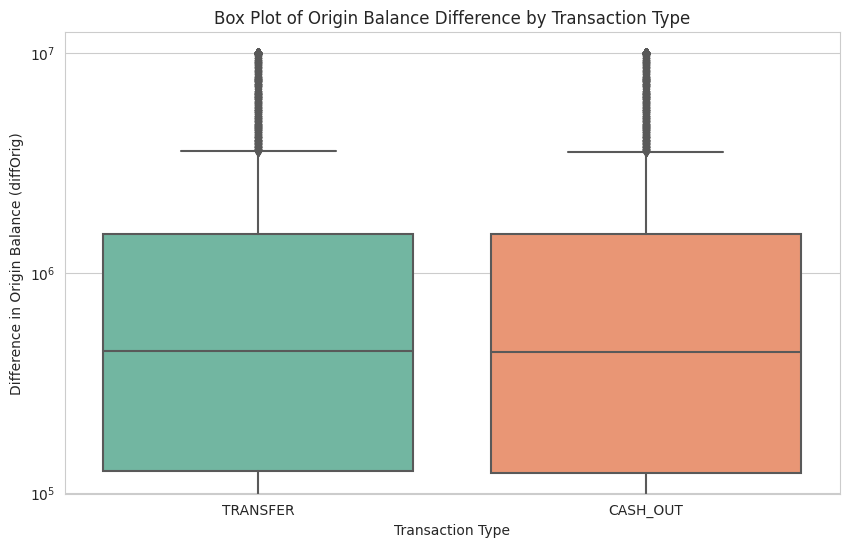

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='diffOrig', data=fraud_df, palette='Set2')
plt.title('Box Plot of Origin Balance Difference by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Difference in Origin Balance (diffOrig)')
plt.yscale('log')
plt.show()

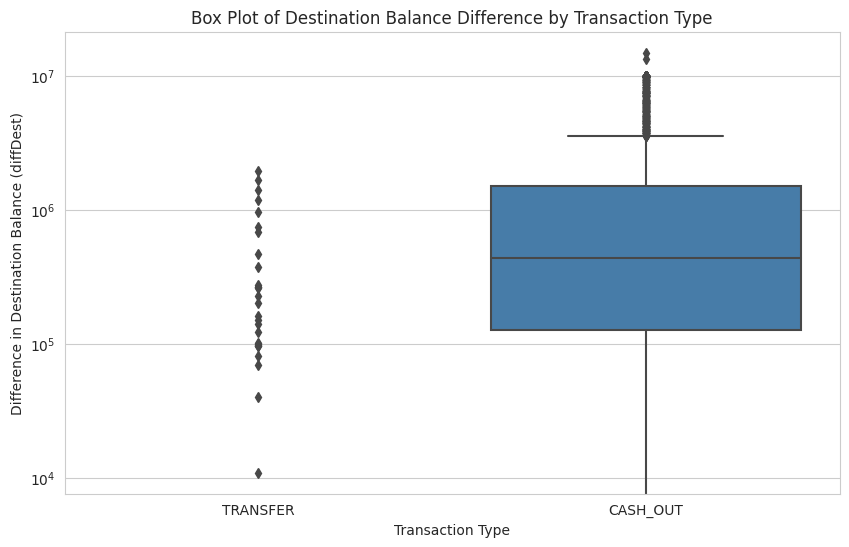

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='diffDest', data=fraud_df, palette='Set1')
plt.title('Box Plot of Destination Balance Difference by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Difference in Destination Balance (diffDest)')
plt.yscale('log')
plt.show()

In [94]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,target,diffOrig,diffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,11668.14,0.0


In [95]:
df.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
target              int64
diffOrig          float64
diffDest          float64
dtype: object

***MODEL***

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [97]:
# Drop irrelevant columns 'nameOrig' and 'nameDest'
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [98]:
# One-Hot Encoding for `type` column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [99]:
# Separate features and target
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [100]:
# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,target,diffOrig,diffDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,0,0,181.00,0.0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,0,0,181.00,-21182.0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0,False,False,True,False


In [102]:
# Apply PCA to reduce dimensions, keeping 5 principal components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [103]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [ ]:
# Train a Decision Tree model on the training data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Predict on the test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Evaluate the model
print("Training Performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report (Train):")
print(classification_report(y_train, y_pred_train))

print("Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

In [ ]:
# Confusion Matrix for Test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Fraud Detection')
plt.show()

In [ ]:
# Visualize the PCA components' explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Feature Importance (based on PCA components)
importances = model.feature_importances_
importance_df = pd.DataFrame({'PCA Component': np.arange(len(importances)), 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='PCA Component', data=importance_df)
plt.title('Feature Importance (PCA Components)')
plt.show()

In [ ]:
# Plot ROC Curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()